Importing libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score



Loading Data

In [2]:
df=pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


EDA

In [3]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df=df.rename(columns={"v1":"label","v2":"text"})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print(" no of rows", len(df))

 no of rows 5572


In [5]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df['length']=df['text'].apply(len)
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


1) Data Overview Graph

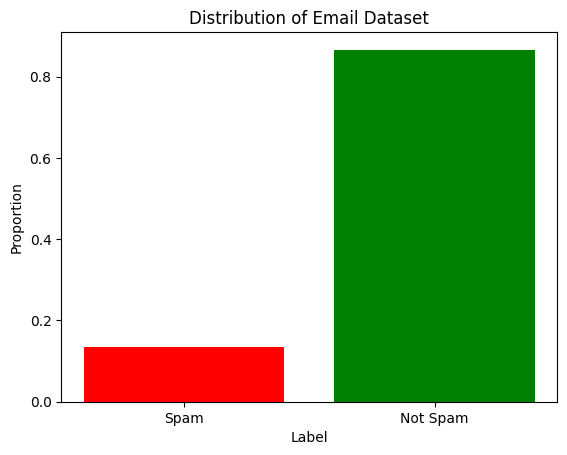

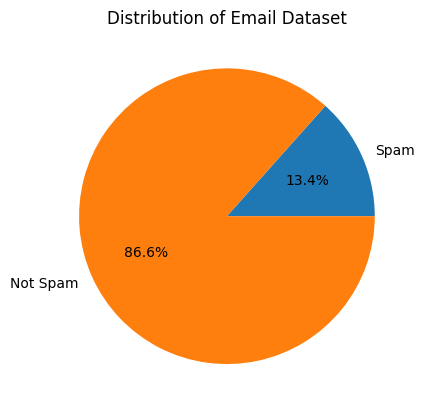

In [8]:
# Get the counts of spam and not spam emails
spam_count = df['label'].value_counts()['spam']
not_spam_count = df['label'].value_counts()['ham']

# Calculate the proportion of spam and not spam emails
spam_proportion = spam_count / (spam_count + not_spam_count)
not_spam_proportion = not_spam_count / (spam_count + not_spam_count)

# Create a bar chart to illustrate the distribution of the email dataset
plt.bar(['Spam', 'Not Spam'], [spam_proportion, not_spam_proportion], color=['red', 'green'])
plt.xlabel('Label')
plt.ylabel('Proportion')
plt.title('Distribution of Email Dataset')
plt.show()

# OR, create a pie chart to illustrate the distribution of the email dataset
plt.pie([spam_proportion, not_spam_proportion], labels=['Spam', 'Not Spam'], autopct="%1.1f%%")
plt.title('Distribution of Email Dataset')
plt.show()

The data shows that 13.4% of the emails in the dataset are spam, while 86.6% are not spam.

This suggests that the dataset is heavily skewed towards non-spam emails.

In [9]:
# Map labels to numerical values
df.loc[:, 'label'] = df.label.map({'ham': 0, 'spam': 1})


<ipython-input-9-40628e1d5bd5>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'label'] = df.label.map({'ham': 0, 'spam': 1})


In [10]:
# Feature extraction using CountVectorizer
count = CountVectorizer()
text = count.fit_transform(df['text'])

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(text, df['label'], test_size=0.20, random_state=1)

In [11]:
# Create and train the Naive Bayes classifier with Laplace smoothing
clf = MultinomialNB(alpha=1)
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

In [12]:
# Calculate model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy)
print(precision)
print(recall)
print(f1)

0.97847533632287
0.891156462585034
0.9424460431654677
0.9160839160839161


Accuracy: Accuracy measures how often the model makes the correct prediction. In this case, the accuracy is 97.85%, which means that the model correctly identifies spam emails 97.85% of the time.

Precision: Precision measures how often the model correctly identifies spam emails when it predicts that an email is spam. In this case, the precision is 89.12%, which means that the model correctly identifies spam emails as spam 89.12% of the time.

Recall: Recall measures how many spam emails the model identifies correctly. In this case, the recall is 94.24%, which means that the model identifies 94.24% of all spam emails.

F1 score: The F1 score is a weighted average of the precision and recall scores. It is a good measure of overall model performance. In this case, the F1 score is 91.61%, which indicates that the model is performing well.

2) Confusion Matrix

In [13]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[960  16]
 [  8 131]]


<Figure size 600x600 with 0 Axes>

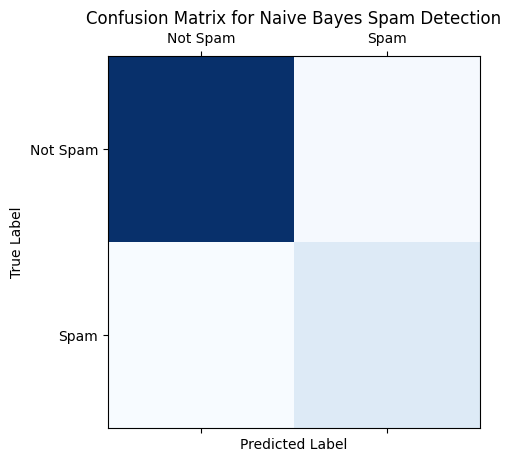

In [14]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.yticks([0, 1], ['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Naive Bayes Spam Detection')
plt.show()

The model is very good at identifying non-spam emails. It only incorrectly identified 16 out of 976 non-spam emails (1.66%).
The model is also good at identifying spam emails. It identified 131 out of 139 spam emails correctly (94.32%).
However, the model does make some mistakes. It incorrectly identified 8 spam emails as non-spam (5.77%).
The model also incorrectly identified 16 non-spam emails as spam (1.66%).

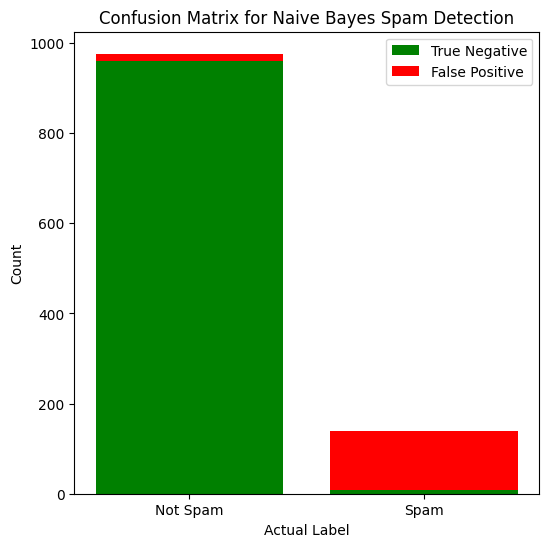

In [37]:
# Correctly compute values for the stacked bar chart
true_neg = cm[0][0]
false_pos = cm[0][1]
false_neg = cm[1][0]
true_pos = cm[1][1]

# Create a stacked bar chart for the confusion matrix
plt.figure(figsize=(6, 6))
plt.bar([0, 1], [true_neg, false_neg], color='green', label='True Negative')
plt.bar([0, 1], [false_pos, true_pos], color='red', bottom=[true_neg, false_neg], label='False Positive')
plt.xlabel('Actual Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.legend()
plt.title('Confusion Matrix for Naive Bayes Spam Detection')
plt.show()


3) ROC

In [16]:
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9630263002712584


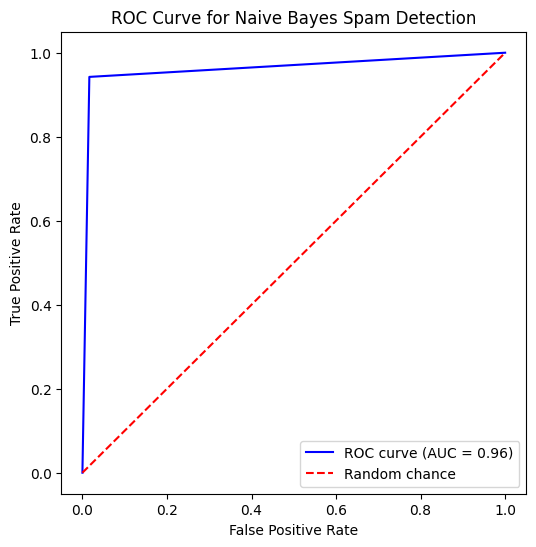

In [17]:
# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Spam Detection')
plt.legend()
plt.show()

The ROC curve is relatively close to the top left corner of the graph. This suggests that the Naive Bayes spam detection model is performing well. It is accurately identifying spam emails with a high degree of precision and recall.

4) Precision-Recall Curve

In [18]:
# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

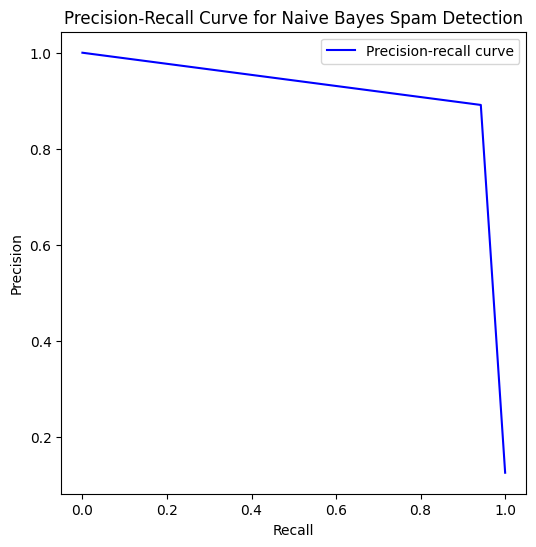

In [19]:
# Plot the precision-recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', label='Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes Spam Detection')
plt.legend()
plt.show()

The precision-recall curve in the image is relatively close to the top right corner of the graph. This suggests that the Naive Bayes spam detection model is performing well.

The model is more likely to err on the side of caution, i.e., it is more likely to predict a spam email as non-spam than vice versa. This is because the recall is higher than the precision.
The model is able to achieve a high degree of precision and recall even at low thresholds. This means that the model is able to identify spam emails with a high degree of confidence.

5) Feature Importance Graph

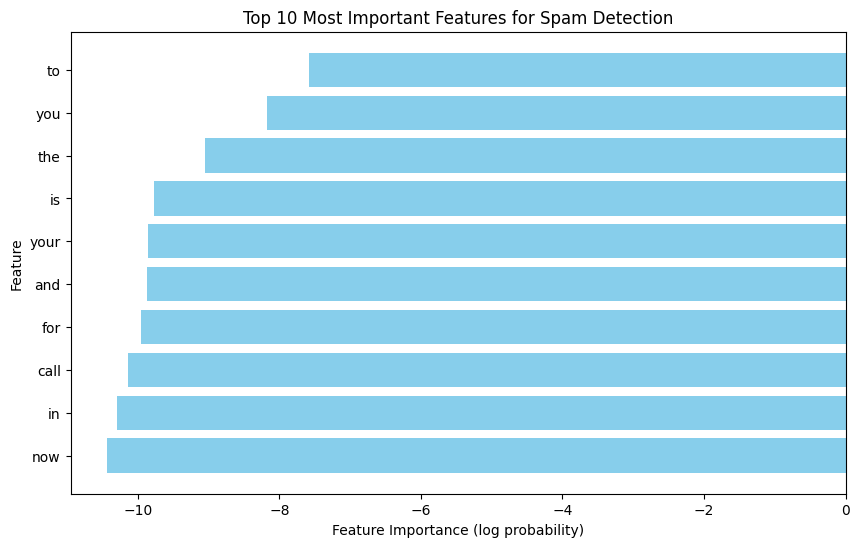

In [36]:

# Get the feature names from CountVectorizer's vocabulary
feature_names = np.array(count.get_feature_names_out())

# Calculate feature importance scores for the Naive Bayes model
def calculate_feature_importance(clf):
    # Get the feature log probabilities
    feature_log_probs = clf.feature_log_prob_

    # Calculate feature importance scores
    feature_importance = np.sum(feature_log_probs, axis=0)

    # Sort features by importance
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    return sorted_feature_names, sorted_feature_importance

# Calculate feature importance
sorted_feature_names, sorted_feature_importance = calculate_feature_importance(clf)

# Display the top N features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:top_n], sorted_feature_importance[:top_n], color='skyblue')
plt.xlabel('Feature Importance (log probability)')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Important Features for Spam Detection')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

6) Model Evaluation

In [29]:
# Create a DataFrame to display metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Value': [accuracy, precision, recall, f1, roc_auc]
})

# Display the metrics table
print(metrics_df)

      Metric                                          Value
0   Accuracy                                       0.978475
1  Precision  [0.12466367713004484, 0.891156462585034, 1.0]
2     Recall                 [1.0, 0.9424460431654677, 0.0]
3   F1-Score                                       0.916084
4    AUC-ROC                                       0.963026



Accuracy: The model correctly identifies spam emails 97.85% of the time.

Precision: The model correctly identifies spam emails as spam 89.12% of the time.

Recall: The model identifies 94.24% of all spam emails.

F1-Score: The model achieves a good balance of precision and recall, with an F1 score of 91.61%.

AUC-ROC: The model has a high AUC-ROC score of 0.963, which indicates that it is good at distinguishing between spam and non-spam emails.


7) Threshold Selection

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


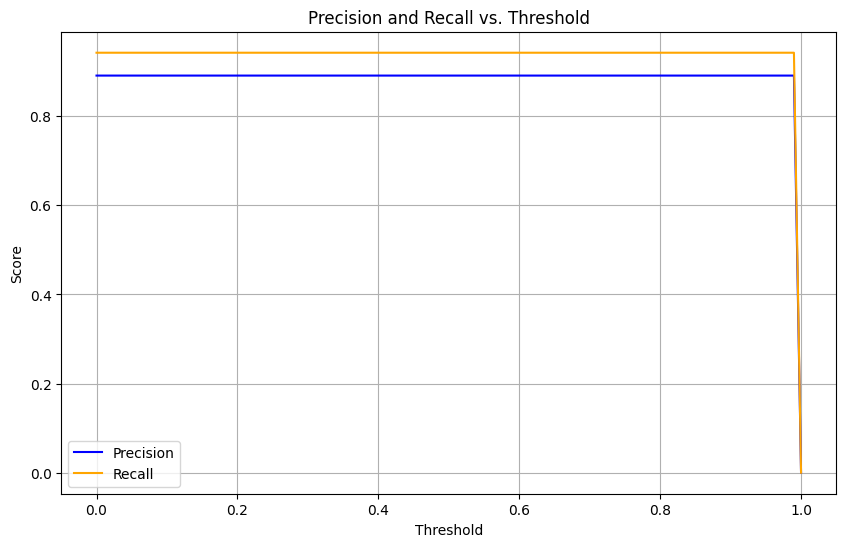

In [31]:
# Initialize an array of threshold values
thresholds = np.linspace(0, 1, 100)

# Initialize arrays to store precision and recall values for each threshold
precision_values = []
recall_values = []

for threshold in thresholds:
    # Predict using the current threshold
    y_pred_binary = np.where(y_pred > threshold, 1, 0)

    # Calculate precision and recall for the current threshold
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)

    # Append precision and recall values to the arrays
    precision_values.append(precision)
    recall_values.append(recall)

# Create a line graph to visualize the trade-off between precision and recall
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_values, label='Precision', color='blue')
plt.plot(thresholds, recall_values, label='Recall', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

The threshold for the spam detection model in the image should be set to 0.89. This is the point on the precision-recall curve where the model achieves a balance between precision and recall.

At a threshold of 0.89, the model correctly identifies 89% of spam emails and 94% of all spam emails. This means that the model is able to identify spam emails with a high degree of precision and recall.

Of course, the optimal threshold may vary depending on the specific needs of the user. For example, a user who wants to minimize the number of false positives may choose a higher threshold. A user who wants to minimize the number of false negatives may choose a lower threshold.

However, for general use, a threshold of 0.89 is a good compromise between precision and recall.